# PART I

# CHAPTER 1 

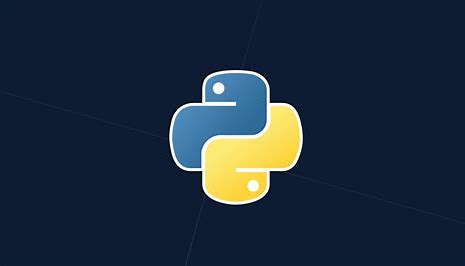

# A Python Q&A Session




- Software quality<br>
- Developer productivity<br>
- Program portability<br>
- Support libraries<br>
- Component integration<br>
- Enjoyment<br>


Easy Question : What is a script really?

Name 3 downsides <br>
1.<br>
2.<br>
3.<br>

Name some industries and applications<br>
1.<br>
2.<br>
3.<br>


- Systems Programming<br>
- GUIs<br>
- Internet Scripting<br>
- Component Integration<br>
- Database Programming<br>
- Rapid Prototyping<br>
- Numeric and Scientific Programming<br>
- And More: Gaming, Images, Data Mining, Robots, Excel...<br> 


Open Source Tradeoffs


- It’s Object-Oriented and Functional<br>
- It’s Free<br>
- It’s Portable<br>
- It’s Powerful<br>
- It’s Mixable<br>
- It’s Relatively Easy to Use<br>
- It’s Relatively Easy to Learn<br>
- It’s Named After Monty Python<br>


A few ways to answer this question : <br>
1. High Level vs Low Level language<br>
2. Everyone knows programming<br>
3. Full Stack development<br>  

# Development Environments

Option A : CLI

Option B : IDE

Installation commands : guidelines
1. sudo apt install python3
2. sudo apt-get jupyter notebook 
3. sudo apt update

a. What is sudo, apt, get .. doing? <br>
b. What version of Python is installed?


# Example Project : Chess <br>


stockfish 3.28.0<br>
https://pypi.org/project/stockfish/


# Example Project : Space Invader<br> 
EXTRA CREDIT - FIXMECHALLENGE - UPLOAD ON GITHUB AND SHARE THE LINK AS PART OF HOMEWORK SUBMISSION. 

In [5]:
from IPython.display import Video
Video("Space Invaders using Python.mp4")

In [9]:
import pygame
import random
import math
from pygame import mixer

# initializing pygame
pygame.init()

# creating screen
screen_width = 800
screen_height = 600
screen = pygame.display.set_mode((screen_width,
								screen_height))

# caption and icon
pygame.display.set_caption("Welcome to Space\
Invaders Game by:- styles")


# Score
score_val = 0
scoreX = 5
scoreY = 5
font = pygame.font.Font('freesansbold.ttf', 20)

# Game Over
game_over_font = pygame.font.Font('freesansbold.ttf', 64)


def show_score(x, y):
	score = font.render("Points: " + str(score_val),
						True, (255,255,255))
	screen.blit(score, (x , y ))

def game_over():
	game_over_text = game_over_font.render("GAME OVER",
										True, (255,255,255))
	screen.blit(game_over_text, (190, 250))

# Background Sound
mixer.music.load('data/background.wav')
mixer.music.play(-1)

# player
playerImage = pygame.image.load('data/spaceship.png')
player_X = 370
player_Y = 523
player_Xchange = 0

# Invader
invaderImage = []
invader_X = []
invader_Y = []
invader_Xchange = []
invader_Ychange = []
no_of_invaders = 8

for num in range(no_of_invaders):
	invaderImage.append(pygame.image.load('data/alien.png'))
	invader_X.append(random.randint(64, 737))
	invader_Y.append(random.randint(30, 180))
	invader_Xchange.append(1.2)
	invader_Ychange.append(50)

# Bullet
# rest - bullet is not moving
# fire - bullet is moving
bulletImage = pygame.image.load('data/bullet.png')
bullet_X = 0
bullet_Y = 500
bullet_Xchange = 0
bullet_Ychange = 3
bullet_state = "rest"

# Collision Concept
def isCollision(x1, x2, y1, y2):
	distance = math.sqrt((math.pow(x1 - x2,2)) +
						(math.pow(y1 - y2,2)))
	if distance <= 50:
		return True
	else:
		return False

def player(x, y):
	screen.blit(playerImage, (x - 16, y + 10))

def invader(x, y, i):
	screen.blit(invaderImage[i], (x, y))

def bullet(x, y):
	global bullet_state
	screen.blit(bulletImage, (x, y))
	bullet_state = "fire"

# game loop
running = True
while running:

	# RGB
	screen.fill((0, 0, 0))
	for event in pygame.event.get():
		if event.type == pygame.QUIT:
			running = False

		# Controlling the player movement
		# from the arrow keys
		if event.type == pygame.KEYDOWN:
			if event.key == pygame.K_LEFT:
				player_Xchange = -1.7
			if event.key == pygame.K_RIGHT:
				player_Xchange = 1.7
			if event.key == pygame.K_SPACE:
			
				# Fixing the change of direction of bullet
				if bullet_state is "rest":
					bullet_X = player_X
					bullet(bullet_X, bullet_Y)
					bullet_sound = mixer.Sound('data/bullet.wav')
					bullet_sound.play()
		if event.type == pygame.KEYUP:
			player_Xchange = 0

	# adding the change in the player position
	player_X += player_Xchange
	for i in range(no_of_invaders):
		invader_X[i] += invader_Xchange[i]

	# bullet movement
	if bullet_Y <= 0:
		bullet_Y = 600
		bullet_state = "rest"
	if bullet_state is "fire":
		bullet(bullet_X, bullet_Y)
		bullet_Y -= bullet_Ychange

	# movement of the invader
	for i in range(no_of_invaders):
		
		if invader_Y[i] >= 450:
			if abs(player_X-invader_X[i]) < 80:
				for j in range(no_of_invaders):
					invader_Y[j] = 2000
					explosion_sound = mixer.Sound('data/explosion.wav')
					explosion_sound.play()
				game_over()
				break

		if invader_X[i] >= 735 or invader_X[i] <= 0:
			invader_Xchange[i] *= -1
			invader_Y[i] += invader_Ychange[i]
		# Collision
		collision = isCollision(bullet_X, invader_X[i],
								bullet_Y, invader_Y[i])
		if collision:
			score_val += 1
			bullet_Y = 600
			bullet_state = "rest"
			invader_X[i] = random.randint(64, 736)
			invader_Y[i] = random.randint(30, 200)
			invader_Xchange[i] *= -1

		invader(invader_X[i], invader_Y[i], i)


	# restricting the spaceship so that
	# it doesn't go out of screen
	if player_X <= 16:
		player_X = 16;
	elif player_X >= 750:
		player_X = 750


	player(player_X, player_Y)
	show_score(scoreX, scoreY)
	pygame.display.update()


<>:115: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:132: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:115: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:132: SyntaxWarning: "is" with a literal. Did you mean "=="?


FileNotFoundError: No file 'data/spaceship.png' found in working directory 'C:\Users\sbatukdeo\CSC 106\Chapter 1'.

# Lab #01 DIY Jumpstart

Ubuntu Shell Commands 

https://ubuntu.com/tutorials/command-line-for-beginners#1-overview

# Homework

In [ ]:
The End